L'objectif de ce NB est de vérifier la distribution des résidus du problème de moindres carrés non linéaires.

## Generate the observations

In [1]:
import numpy as np
import openturns as ot

In [2]:
ot.RandomGenerator.SetSeed(0)

In [3]:
def modelChaboche(X):
    strain,R,C,gamma = X
    stress = R + C*(1-np.exp(-gamma*strain))
    return [stress]

In [4]:
g = ot.PythonFunction(4, 1, modelChaboche) 

In [5]:
unknownR = 750
unknownC = 2750
unknownGamma = 10
unknownParameter = ot.Point([unknownR,unknownC,unknownGamma])
descr = ["R", "C", "Gamma"]
unknownParameter

class=Point name=Unnamed dimension=3 values=[750,2750,10]

In [6]:
calibratedIndices = [1,2,3]
model = ot.ParametricFunction(g, calibratedIndices, unknownParameter)

In [7]:
R = 700 # Exact : 750e6
C = 2500 # Exact : 2750e6
Gamma = 8. # Exact : 10
candidate = ot.Point([R,C,Gamma])
candidate

class=Point name=Unnamed dimension=3 values=[700,2500,8]

In [8]:
parameterDimension = candidate.getDimension()
parameterDimension

3

In [9]:
Strain = ot.Uniform(0,0.07)
R = ot.Dirac(unknownR)
C = ot.Dirac(unknownC)
Gamma = ot.Dirac(unknownGamma)

Strain.setDescription(["Strain"])
R.setDescription(["R"])
C.setDescription(["C"])
Gamma.setDescription(["Gamma"])
    
inputRandomVector = ot.ComposedDistribution([Strain, R, C, Gamma])

## Calibration

In [10]:
stressObservationNoiseSigma = 40. # (Pa)
observationOutputNoise = ot.Normal(0.,stressObservationNoiseSigma)

In [11]:
size = 100

In [12]:
# 1. Generate exact outputs
inputSample = inputRandomVector.getSample(size)
outputStress = g(inputSample)
# 2. Add noise
sampleNoiseH = observationOutputNoise.getSample(size)
outputObservations = outputStress + sampleNoiseH
# 3. Calibrate
inputObservations = inputSample[:,0]
algo = ot.NonLinearLeastSquaresCalibration(model, inputObservations, outputObservations, candidate)
algo.run()
calibrationResult = algo.getResult()

In [13]:
outputObservations = calibrationResult.getOutputObservations()

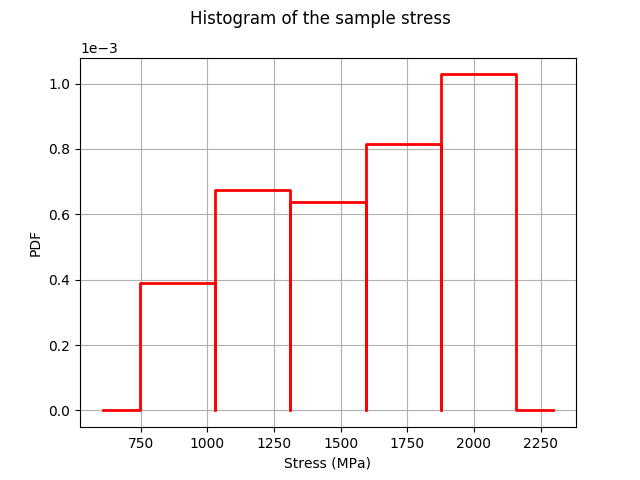

In [14]:
histoGraph = ot.HistogramFactory().build(outputObservations).drawPDF()
histoGraph.setTitle("Histogram of the sample stress")
histoGraph.setXTitle("Stress (MPa)")
histoGraph.setLegends([""])
histoGraph

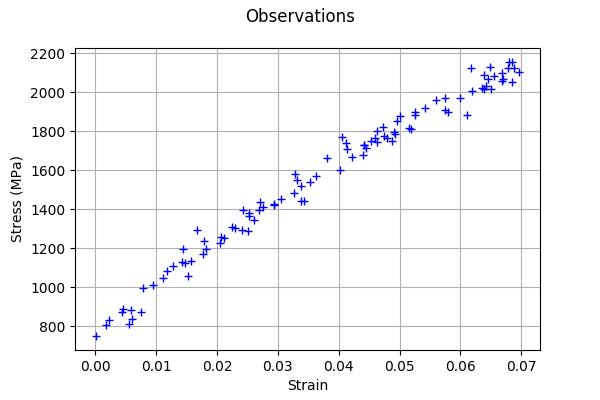

In [15]:
graph = ot.Graph("Observations","Strain","Stress (MPa)",True)
# Observations
cloud = ot.Cloud(inputObservations,outputObservations)
graph.add(cloud)
graph

## Analysis of the results

The `getParameterMAP` method returns the maximum of the posterior distribution of $\theta$.

In [16]:
thetaStar = calibrationResult.getParameterMAP()
thetaStar

class=Point name=Unnamed dimension=3 values=[746.708,2818.98,9.66605]

In [17]:
thetaPosterior = calibrationResult.getParameterPosterior()
thetaPosterior

class=KernelMixture name=KernelMixture kernel=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] bandwidth=class=Point name=Unnamed dimension=3 values=[7.50037,99.7296,0.518676] sample=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=3 data=[[748.823,2627.62,10.4715],[758.769,2915.75,9.05141],[756.262,2578.29,10.9044],[745.57,3159.96,8.35654],[741.696,2554.87,11.0507],[763.965,2787.19,9.58432],[768.917,2974,8.77126],[744.889,2830.01,9.6027],[753.544,2829.73,9.49503],[738.02,3127.43,8.52912],[738.803,2715.84,10.3047],[743.467,2725.09,10.2683],[740.855,2735.59,10.0928],[737.522,2828.03,9.68185],[733.151,3071.69,8.76741],[759.846,2703.05,10.0646],[738.253,2717.92,10.2401],[753.166,2831.25,9.58522],[711.288,2274.12,13.4976],[758.085,2688.11,10.1014],[760.146,2748.01,9.87837],[737.077,2858.14,9.66258],[775.074,2932.01,8.77898],[741.974,2646.32,10.5651],[747.534,3308.53,7.93246],[739.81,2845,9.59783],[752.804,2801.8,9.58974],[749.052,2873.37,9.55548],[723.734,2636.72,10.8571],[748.261,2764.91,9.8281],[760.978,2958.21,8.88809],[738.229,2710.6,10.2467],[759.308,2921.26,9.09392],[744.65,2816.3,9.66665],[753.8,3075.83,8.55876],[732.092,2542.23,11.3207],[748.649,2819.37,9.68984],[742.881,2862.37,9.55051],[759.108,2931.11,9.04568],[748.898,2843.89,9.6146],[752.416,2970.94,9.05492],[723.658,2577.45,11.1924],[750.308,2836.04,9.51419],[738.914,2743.91,10.0087],[765.06,3043.44,8.55252],[759.563,2841.22,9.38002],[738.202,3306.3,8.0538],[750.723,2700.31,10.1615],[732.061,3094.83,8.71282],[757.688,2760.95,9.74001],[727.365,2558.64,11.3362],[744.714,2654.69,10.4275],[721.632,2396.7,12.3517],[737.102,2656.08,10.5361],[754.919,2995.74,8.99479],[770.279,2695.51,9.89392],[742.401,2718.66,10.0967],[746.215,2804.26,9.73847],[740.101,2698.23,10.3893],[738.519,2647.28,10.7109],[741.127,3040.76,8.79219],[758.659,2824.47,9.43825],[774.371,3304.95,7.66408],[734.641,3062.44,8.79702],[753.578,3031.92,8.75066],[745.749,2593.09,10.8757],[774.38,3256.24,7.7798],[730.68,2586.77,11.0479],[758.312,2784.28,9.72411],[755.935,3058.75,8.53294],[755.126,2944.58,9.07212],[762.52,2832.84,9.38848],[714.601,2449.66,12.1882],[747.362,2588.8,10.7469],[735.471,2406.54,12.1587],[773.698,2955.33,8.76458],[760.594,3006.9,8.63575],[751.273,3169.14,8.30129],[757.971,2783.33,9.6933],[743.864,2587.22,10.9898],[758.306,2870.59,9.30186],[736.998,2720.68,10.2961],[745.934,2677.26,10.287],[741.84,2673.81,10.3529],[738.996,2784.28,9.92192],[737.509,2858.21,9.68144],[750.128,2714.04,10.0224],[740.658,2623.11,10.6555],[747.848,2436.26,11.8257],[773.21,3233.78,7.82093],[776.122,3149.55,7.98552],[715.586,2710.24,10.6397],[725.613,2694.64,10.6557],[751.511,2712.53,10.0949],[758.503,2734.89,9.88879],[750.346,2685.68,10.1925],[739.997,2803.67,9.77384],[760.134,2978.62,8.92837],[724.104,2692.31,10.5357],[760.209,3536.73,7.18784]]

In [18]:
covarianceThetaStarOT = thetaPosterior.getCovariance()
covarianceThetaStarOT

class=CovarianceMatrix dimension=3 implementation=class=MatrixImplementation name=Unnamed rows=3 columns=3 values=[242.539,1509.29,-9.52352,1509.29,57365,-226.755,-9.52352,-226.755,1.42318]

## Draw residual distribution

The goal is to check the distribution of the residuals.

In [19]:
residualDistribution = calibrationResult.getObservationsError()
residualDistribution

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[-3.0897e-09] sigma=class=Point name=Unnamed dimension=1 values=[43.9724] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

In [20]:
# Compute yAtPosterior
meanPosterior = calibrationResult.getParameterPosterior().getMean()
model.setParameter(meanPosterior)
outputAtPosterior=model(inputObservations)

In [21]:
outputObservations = calibrationResult.getOutputObservations()

In [22]:
posteriorResiduals = outputAtPosterior - outputObservations

In [23]:
kernel = ot.KernelSmoothing()
fittedDist = kernel.build(posteriorResiduals)
residualPDF = fittedDist.drawPDF()
residualPDF.setColors(["green"])

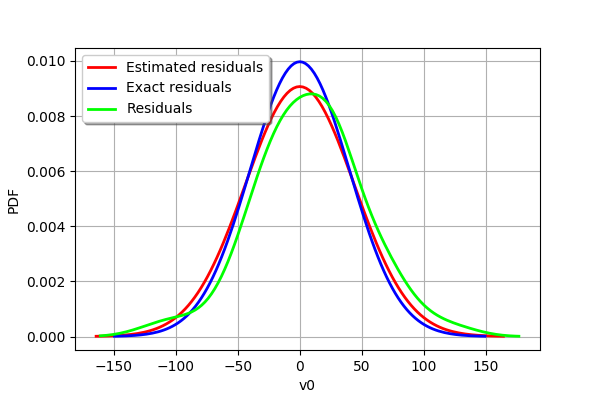

In [24]:
graph = residualDistribution.drawPDF()
graphExact = observationOutputNoise.drawPDF()
graphExact.setColors(["blue"])
graph.add(graphExact)
graph.add(residualPDF)
graph.setLegends(["Estimated residuals","Exact residuals","Residuals"])
graph.setLegendPosition("topleft")
graph